<a href="https://colab.research.google.com/github/yasmin26n/Komputasi-Intelegensia/blob/main/TaskWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KOMPUTASI INTELEGENSIA**

Nama : Yasmin Nashwa Alifya

NPM : 2106725040

# 8.1. Deep Convolutional Neural Networks (AlexNet)

In [1]:
!pip install d2l
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [3]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

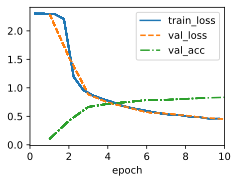

In [4]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

## Exercise

### 1. Following up on the discussion above, analyze the computational properties of AlexNet.

1.1 Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?

Fomula of the number of parameters of convolutions is $∑layers(ci∗co∗kh∗kw+co)$

In [60]:
3*96*11*11+96+96*256*5*5+256+256*384*3*3+384+384*384*3*3+384+384*256*3*3+256

3747200

Fomula of the number of parameters of fully connected is $∑layers(xi∗xo+xo)$

In [61]:
80*80*4096+4096+4096*4096+4096+4096*10+10

43040778

The fully connected layers dominates

In [69]:
!jupyter nbconvert --to markdown 8_8_6_Exercises.ipynb

[NbConvertApp] WARNING | pattern '8_8_6_Exercises.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute

In [71]:
import sys
import torch.nn as nn
import torch
import warnings
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
from torchsummary import summary
warnings.filterwarnings("ignore")

# Check if d2l.torch has Classifier
if hasattr(d2l, 'torch') and hasattr(d2l.torch, 'Classifier'):
    d2l_classifier = d2l.torch.Classifier
else:
    # Check if d2l has Classifier
    if hasattr(d2l, 'Classifier'):
        d2l_classifier = d2l.Classifier
    else:
        # Handle the case where Classifier is not found
        raise ImportError("Classifier not found in d2l or d2l.torch")

class Alexnet(d2l_classifier): # Use d2l_classifier here
    def __init__(self,lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
                                 nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
                                 nn.LazyConv2d(256, kernel_size=5, padding=2),
                                 nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
                                 nn.LazyConv2d(384, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.LazyConv2d(384, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes)
                                 )

In [72]:
model = Alexnet()
X = torch.randn(1,3, 224, 224)
_ = model(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    if type(module) not in (nn.Linear,nn.Conv2d):
        continue
    num = sum(p.numel() for p in module.parameters())
    # print(f"Module {idx + 1}: {num} parameters type:{type(module)}")
    if type(module) == nn.Conv2d:
        params['conv'] += num

    else:
        params['lr'] += num

params

{'conv': 3747200, 'lr': 43040778}

In [74]:
model = Alexnet()
X = torch.randn(1,3, 224, 224)

# Move model to the same device as the input data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
X = X.to(device)

_ = model(X)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(model.net):
    if type(module) not in (nn.Linear,nn.Conv2d):
        continue
    num = sum(p.numel() for p in module.parameters())
    # print(f"Module {idx + 1}: {num} parameters type:{type(module)}")
    if type(module) == nn.Conv2d:
        params['conv'] += num

    else:
        params['lr'] += num

params

summary(model, (3, 224, 224)) # Now the model and input are on the same device

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 54, 54]          34,944
              ReLU-2           [-1, 96, 54, 54]               0
         MaxPool2d-3           [-1, 96, 26, 26]               0
            Conv2d-4          [-1, 256, 26, 26]         614,656
              ReLU-5          [-1, 256, 26, 26]               0
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 384, 12, 12]         885,120
              ReLU-8          [-1, 384, 12, 12]               0
            Conv2d-9          [-1, 384, 12, 12]       1,327,488
             ReLU-10          [-1, 384, 12, 12]               0
           Conv2d-11          [-1, 256, 12, 12]         884,992
             ReLU-12          [-1, 256, 12, 12]               0
        MaxPool2d-13            [-1, 256, 5, 5]               0
          Flatten-14                 [-

1.2 Calculate the computational cost for the convolutions and the fully connected layers.

Fomula of the computational cost for convolutions is $∑layers(ci∗co∗kh∗kw∗ho∗wo)$

In [64]:
3*96*11*11*54*54+96*256*5*5*26*26+256*384*3*3*12*12+384*384*3*3*12*12+384*256*3*3*12*12

962858112

Fomula of the computational cost for fully connected layers is $∑layers(xi∗xo+xo)$

In [65]:
80*80*4096+4096+4096*4096+4096+4096*10+10

43040778

In [76]:
x = torch.randn(1,3, 224, 224)
params = {'conv':0, 'lr':0}
# Move the model to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.net.to(device)

for idx, module in enumerate(model.net):
    c_i = x.shape[1]
    # Move the input tensor to the same device as the model
    x = x.to(device)
    x = module(x)
    if type(module) == nn.Conv2d:
        k = [p.shape for p in module.parameters()]
        c_o,h_o,w_o = x.shape[1], x.shape[2], x.shape[3]
        params['conv'] += c_i*c_o*h_o*w_o*k[0][-1]*k[0][-2]
    if type(module) == nn.Linear:
        params['lr'] += sum(p.numel() for p in module.parameters())
params

{'conv': 962858112, 'lr': 43040778}

In [78]:
X = torch.randn(1,3, 224, 224)
# Move the input tensor to the same device as the model
X = X.to(device)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

Total parameters: 46787978


1.3 How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?

Pengaruh Karakteristik Memori pada Komputasi Neural Network

**1. Bandwidth Baca dan Tulis:**

- Efek:Bandwidth tinggi memungkinkan perpindahan data yang lebih cepat antara memori dan unit pemrosesan.
- Dampak:Akses data yang lebih cepat meningkatkan throughput komputasi, mengurangi waktu tunggu, dan mempercepat pelatihan serta inferensi.
- Training vs Inference:Keduanya diuntungkan dari bandwidth tinggi, karena perpindahan data sering menjadi bottleneck.

**2. Latensi:**

- Efek:Latensi rendah mempercepat akses data dari memori.
- Dampak: Mengurangi waktu tunggu untuk akses data, sehingga mempercepat pemrosesan.
- Training vs Inference: Latensi mempengaruhi keduanya; pelatihan memerlukan akses cepat untuk pembaruan bobot, sementara inferensi membutuhkan respon cepat untuk aplikasi real-time.

**3. Ukuran Memori:**

- Efek:Ukuran memori menentukan seberapa banyak data yang dapat disimpan.
- Dampak: Memori yang cukup mengurangi kebutuhan untuk perpindahan data yang sering, meningkatkan kinerja.
- Training vs Inference: Keduanya memerlukan memori yang cukup untuk menyimpan hasil sementara; pelatihan memerlukan ruang untuk gradien dan parameter model, sementara inferensi memerlukan ruang untuk hasil selama proses feedforward.

**Perbedaan Antara Training dan Inference:**

- Pelatihan: Memerlukan bandwidth tinggi karena seringnya pembaruan bobot dan gradien, terutama dalam pemrosesan batch.
- Inferensi: Fokus pada latensi dan waktu respons, dengan kebutuhan bandwidth tinggi tetapi sedikit lebih terbuka terhadap optimasi latensi.

### 2. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?

Mengoptimalkan trade-off antara komputasi dan bandwidth memori dalam desain chip adalah tugas yang kompleks tetapi sangat penting. Berikut adalah pendekatan yang disederhanakan:

**1. Tentukan Tujuan Kinerja:**
   Identifikasi kebutuhan aplikasi (misalnya, inferensi real-time, pelatihan batch) dan tetapkan tujuan untuk kecepatan komputasi, kecepatan akses memori, dan efisiensi sistem secara keseluruhan.

**2. Profil Beban Kerja:**
   Analisis karakteristik beban kerja, termasuk tugas utama, pola akses memori, ukuran data, dan frekuensi komunikasi.

**3. Eksplorasi Arsitektur:**
   Teliti berbagai opsi arsitektur untuk menyeimbangkan unit komputasi (inti, unit SIMD) dan subsistem memori (hierarki cache, bank memori) dan pertimbangkan trade-off seperti jumlah inti, ukuran cache, dan hierarki memori.

**4. Desain Hierarki Memori:**
   Rancang hierarki memori yang efektif untuk meminimalkan bottleneck serta tentukan tingkat cache, protokol koherensi, dan jenis memori (SRAM, DRAM).

**5. Efisiensi Daya:**
   Terapkan teknik untuk mengoptimalkan konsumsi daya, seperti penyesuaian tegangan dan frekuensi dinamis (DVFS) serta akses memori yang efisien.

**6. Area Chip dan Integrasi:**
   Seimbangkan area chip antara komponen komputasi dan memori berdasarkan kebutuhan kinerja dan batasan biaya dan integrasikan memori dekat dengan unit komputasi untuk mengurangi latensi dan meningkatkan bandwidth.

**7. Peningkatan Bandwidth Memori:**
   Teliti opsi seperti bus memori lebar dan antarmuka berkecepatan tinggi (misalnya, HBM, GDDR).

**8. Paralelisme dan Pipelining:**
   Gunakan teknik paralelisme dan pipelining untuk menggabungkan komputasi dan akses memori, mengurangi dampak latensi memori.

**9. Simulasi dan Pemodelan:**
   Gunakan alat simulasi untuk mengevaluasi pilihan desain, menganalisis metrik kinerja dan konsumsi daya.

**10. Umpan Balik:**
   Refine desain secara iteratif berdasarkan umpan balik dari simulasi dan benchmark, menyesuaikan trade-off untuk hasil optimal.

**11. Validasi dan Pengujian:**
   Validasi desain melalui pengujian menyeluruh pada berbagai beban kerja.

**12. Batasan Dunia Nyata:**
   Pertimbangkan proses manufaktur, batasan biaya, dan tantangan waktu pemasaran.

### 3. Why do engineers no longer report performance benchmarks on AlexNet?

1. Kemajuan Arsitektur
Seiring waktu, arsitektur yang lebih canggih seperti VGG, ResNet, Inception, dan model berbasis Transformer (seperti BERT dan GPT) telah muncul dan menjadi lebih populer untuk benchmarking. Model-model ini umumnya menawarkan akurasi dan efisiensi yang lebih baik dibandingkan AlexNet.

2. Model Spesifik Domain
Tergantung pada bidang aplikasi, insinyur mungkin lebih memilih untuk membenchmark model yang dirancang khusus untuk tugas tertentu. Misalnya, EfficientNet lebih cocok untuk klasifikasi gambar yang efisien, sedangkan Faster R-CNN lebih relevan untuk deteksi objek.

3. Evolusi Perangkat Keras dan Perangkat Lunak
Benchmark kinerja sering dipengaruhi oleh perangkat keras (seperti GPU dan TPU) dan perangkat lunak (framework deep learning dan optimasi). Seiring berkembangnya teknologi perangkat keras dan perangkat lunak, insinyur cenderung memilih model-model terbaru yang dioptimalkan untuk teknologi terkini.

### 4. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?

Meningkatkan epoch saat melatih AlexNet akan menghasilkan performa yang lebih baik daripada LeNet.
- AlexNet lebih kompleks: Memiliki lebih banyak layer dan parameter, sehingga mampu mempelajari pola yang lebih rumit.
- ReLU dan Dropout: AlexNet menggunakan fungsi aktivasi ReLU dan teknik dropout yang membantu menghindari overfitting dan meningkatkan akurasi.

Akan tetapi, AlexNet butuh waktu training yang lebih lama karena lebih kompleks.

### 5. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.

5.1 Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.

In [80]:
import torch.nn as nn

class SimplifiedAlexNet(nn.Module):
    def __init__(self):
        super(SimplifiedAlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 3 * 3, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

5.2 Design a better model that works directly on 28×28
 images.

In [84]:
!pip install -U d2l # Make sure you have the latest version of d2l installed

import torch
from torch import nn
from d2l import torch as d2l

class SmallAlexnet(d2l.Classifier): # Use d2l.torch.Classifier
    def __init__(self,lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(512, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(512, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(1024), nn.ReLU(),
            nn.LazyLinear(num_classes)
            )

### 6. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.

AttributeError: 'Trainer' object has no attribute 'train_iter_sec'

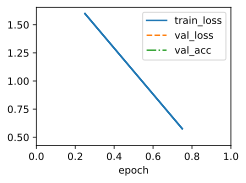

In [86]:
import torch
from torch import nn
from d2l import torch as d2l

class SmallAlexnet(d2l.Classifier):
    def __init__(self,lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(512, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(512, kernel_size=3, padding=1),nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1),nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(1024), nn.ReLU(),
            nn.LazyLinear(num_classes)
            )

# Use a utility function to measure the performance with different batch sizes
def train_with_batch_size(batch_size):
    model = SmallAlexnet(lr=0.01)
    data = d2l.FashionMNIST(batch_size=batch_size)
    trainer = d2l.Trainer(max_epochs=1, num_gpus=1) # Use 1 GPU
    trainer.fit(model, data)

    # Return the throughput, accuracy, and GPU memory usage
    return trainer.train_iter_sec[-1], trainer.train_acc[-1], torch.cuda.max_memory_allocated() # Changed train_batch_sec to train_iter_sec

# Try different batch sizes
batch_sizes = [16, 32, 64, 128, 256, 512]
results = []
for batch_size in batch_sizes:
    throughput, accuracy, gpu_memory = train_with_batch_size(batch_size)
    results.append([batch_size, throughput, accuracy, gpu_memory])
    print(f'Batch size: {batch_size}, Throughput: {throughput:.2f} img/sec, Accuracy: {accuracy:.4f}, GPU Memory: {gpu_memory/(1024*1024):.2f} MB')

# You can further process the 'results' list to analyze the impact of batch size

### 7. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?

acc: 0.78


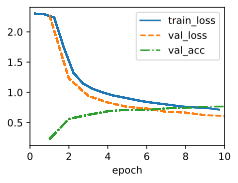

In [87]:
class LeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.LazyConv2d(6, kernel_size=5, padding=2),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.LazyConv2d(16, kernel_size=5),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size=2, stride=2),
                                 nn.Flatten(),
                                 nn.LazyLinear(120),
                                 nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(84),
                                 nn.ReLU(), nn.Dropout(0.5),
                                 nn.LazyLinear(num_classes))
model = LeNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

### 8. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?

Overfitting terjadi ketika model menunjukkan kinerja yang sangat baik pada data pelatihan tetapi tidak dapat menggeneralisasi dengan baik pada data yang tidak dikenal.

Beberapa cara untuk membuat AlexNet overfit
1. Data Pelatihan Terbatas

  Kurangi ukuran dataset pelatihan secara drastis. Dengan dataset yang kecil, model bisa dengan mudah menghafal informasi, yang menyebabkan overfitting.
2. Model yang Kompleks

  Tingkatkan kapasitas model dengan menambah lebih banyak lapisan, unit, atau filter. Ini bisa menyebabkan model memiliki lebih banyak parameter daripada yang diperlukan untuk menyesuaikan dengan data pelatihan yang terbatas.
3. Epochs yang Sedikit

  Latih model hanya untuk jumlah epoch yang terbatas. Overfitting dapat terjadi jika model tidak memiliki cukup waktu untuk belajar pola yang relevan dari data.

# 8.2 Networks Using Blocks (VGG)

In [5]:
import torch
from torch import nn
from d2l import torch as d2l

In [6]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [7]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [8]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


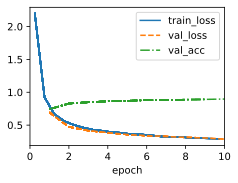

In [9]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Excercise

### 1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.

  - Compare the number of parameters needed for AlexNet and VGG.
  - Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.
  -How could you reduce the computational cost created by the fully connected layers?

In [90]:
!pip install d2l==1.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: d2l
    Found existing installation: d2l 1.0.3
    Uninstalling d2l-1.0.3:
      Successfully uninstalled d2l-1.0.3


In [94]:
import sys
import torch.nn as nn
import torch
import warnings
import d2l
from torchsummary import summary
warnings.filterwarnings("ignore")

def stat_params(net, params):
    for idx, module in enumerate(net):
        if type(module) not in (nn.Linear, nn.Conv2d):
            continue
        num = sum(p.numel() for p in module.parameters())
        if type(module) == nn.Conv2d:
            params['conv'] += num
        else:
            params['lr'] += num
    return params # Mengembalikan dictionary params

1.1 Compare the number of parameters needed for AlexNet and VGG

In [99]:
!pip install --upgrade d2l

In [ ]:
import sys
import torch.nn as nn
import torch
import warnings
from d2l import torch as d2l # import the torch submodule
from torchsummary import summary
warnings.filterwarnings("ignore")

def stat_params(net, params):
    for idx, module in enumerate(net):
        if type(module) not in (nn.Linear, nn.Conv2d):
            continue
        num = sum(p.numel() for p in module.parameters())
        if type(module) == nn.Conv2d:
            params['conv'] += num
        else:
            params['lr'] += num
    return params # Mengembalikan dictionary params

# Contoh penggunaan untuk AlexNet
alexnet = d2l.alexnet() # call alexnet on the torch submodule - note the lowercase 'a'
params = {'conv': 0, 'lr': 0}
stat_params(alexnet, params)
print(f"Jumlah parameter di AlexNet: {params['conv'] + params['lr']}")

# Contoh penggunaan untuk VGG11
vgg11 = d2l.vgg11()
params = {'conv': 0, 'lr': 0}
stat_params(vgg11, params)
print(f"Jumlah parameter di VGG11: {params['conv'] + params['lr']}")

1.2 Compare the number of floating point operations used in the convolutional layers and in the fully connected layers

In [ ]:
x = torch.randn(1,3, 224, 224)
params = {'conv':0, 'lr':0}
for idx, module in enumerate(vgg.net):
    if type(module) == nn.Sequential:
        x = stat_comp(module, params, x)
    if type(module) == nn.Linear:
        params['lr'] += sum(p.numel() for p in module.parameters())
params

In [ ]:
X = torch.randn(1,3, 224, 224)
_ = vgg(X)
total_params = sum(p.numel() for p in vgg.parameters())
print("Total parameters:", total_params)

1.3 How could you reduce the computational cost created by the fully connected layers?

- Kurangi Jumlah Unit

  Kecilkan ukuran lapisan dengan menggunakan lebih sedikit neuron, yang secara langsung mengurangi jumlah parameter dan komputasi.
- Gunakan Global Average Pooling

  Ganti lapisan FC dengan global average pooling, yang menghitung rata-rata output untuk setiap peta fitur, sehingga mengurangi jumlah parameter secara signifikan.
- Faktorisasi Low-Rank

  Faktorkan matriks bobot dari lapisan FC menjadi matriks berperingkat lebih rendah, mengurangi biaya komputasi sambil memperkirakan matriks asli.
- Gunakan Lapisan Konvolusional Sebagai Pengganti

  Ganti lapisan FC dengan lapisan konvolusional, yang memerlukan lebih sedikit parameter dan lebih efisien dalam menangkap hierarki spasial.
- Kuantisasi

  Kuantisasi bobot dan aktivasi ke presisi yang lebih rendah, yang dapat mengurangi penggunaan memori dan biaya komputasi secara signifikan.

### 2. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?

### 3. Use Table 1 in the VGG paper (Simonyan and Zisserman, 2014) to construct other common models, such as VGG-16 or VGG-19.

In [ ]:
vgg

In [103]:
arch16=((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
vgg16 = VGG(arch=arch16)
vgg16

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, 

In [104]:
arch19=((2, 64), (2, 128), (4, 256), (4, 512), (4, 512))
vgg19 = VGG(arch=arch19)
vgg19

VGG(
  (net): Sequential(
    (0): Sequential(
      (0): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): LazyConv2d(0, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): LazyConv2d(0, 256, kernel

### 4. Upsampling the resolution in Fashion-MNIST eight-fold from to dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper (Simonyan and Zisserman, 2014) for ideas on adding more nonlinearities prior to downsampling.

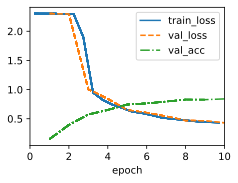

In [105]:
model = VGG(arch=((3, 128), (3, 256)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
trainer.fit(model, data)


# 8.3 Network in Network (NiN)

In [10]:
import torch
from torch import nn
from d2l import torch as d2l

In [11]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

In [12]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [13]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


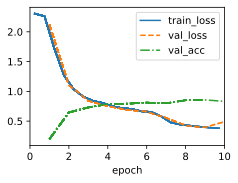

In [14]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## Excercise

### 1. Why are there two 1×1 convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?

Dalam arsitektur Network in Network (NiN), lapisan konvolusi 1×1 digunakan untuk **menambah non-linearitas dan meningkatkan kapasitas jaringan** tanpa menambah banyak parameter.

**Pengaruh dari jumlah lapisan**  konvolusi 1×1 dalam blok NiN:
- Dua Lapisan 1×1 per Blok NiN

  Dengan dua lapisan 1×1, jaringan dapat menciptakan beberapa jalur untuk transformasi fitur. Setiap konvolusi menangani operasi sendiri, memungkinkan jaringan menangkap hubungan kompleks antar fitur, yang dapat meningkatkan akurasi dan ekspresivitas fitur.

- Tiga Lapisan 1×1 per Blok NiN

  Menambah jumlah lapisan 1×1 meningkatkan kapasitas jaringan lebih jauh. Setiap lapisan tambahan menambah non-linearitas dan kemampuan menangkap interaksi yang lebih kompleks. Namun, ini juga dapat meningkatkan jumlah parameter dan komputasi, berisiko menyebabkan overfitting dan biaya komputasi yang lebih tinggi.

- Satu Lapisan 1×1 per Blok NiN

  Menggunakan satu lapisan 1×1 mengurangi kompleksitas blok NiN, tetapi membatasi kapasitas jaringan dalam menangkap interaksi fitur yang kompleks. Ini bisa menyebabkan underfitting jika dataset dan tugasnya kompleks. Selain itu, mengurangi jumlah konvolusi juga mengurangi parameter dan komputasi, yang menguntungkan untuk pelatihan yang lebih cepat dan penggunaan memori yang lebih rendah.

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

class NiN(nn.Module):
    def __init__(self, arch, num_classes=10, lr=0.1):
        super().__init__()
        d2l.save_hyperparameters(self) # use d2l.save_hyperparameters
        self.net = nn.Sequential()
        for i,(num_channels, kernel_size, strides, padding,num_outputs) in enumerate(arch):
            self.net.add_module(f'block{i}',
                nn.Sequential(nn.LazyConv2d(num_channels, kernel_size=kernel_size,
                                        stride=strides,padding=padding),
                                nn.ReLU(),
                                nn.LazyConv2d(num_outputs, kernel_size=1), nn.ReLU(),
                                nn.LazyConv2d(num_outputs, kernel_size=1), nn.ReLU()))
        self.net.add_module('flatten', nn.Flatten())
        self.net.add_module('linear', nn.LazyLinear(num_classes))

    def forward(self, x):
        return self.net(x)

    def accuracy(self,y_hat, y):
        """Compute the number of correct predictions.

        Defined in :numref:`sec_softmax_scratch`"""
        if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
            y_hat = d2l.argmax(y_hat, axis=1)
        cmp = d2l.astype(y_hat, y.dtype) == y
        return float(d2l.reduce_sum(d2l.astype(cmp, y.dtype)))

arch = ((96,11,4,0,3),(256,5,1,2,3),(384,3,1,1,3),(10,3,1,1,3))
model = NiN(arch) # Changed Nin to NiN
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

In [ ]:
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
arch = ((96,11,4,0,[[1,0]]),(256,5,1,2,[[1,0]]),(384,3,1,1,[[1,0]]),(10,3,1,1,[[1,0]]))
model = Nin(arch, lr=0.05)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

### 2. What changes if you replace the 1 × 1convolutions by 3 x 3 convolutions?

In [ ]:
arch = ((96,11,4,0,[[3,1],[3,1]]),(256,5,1,2,[[3,1],[3,1]]),(384,3,1,1,[[3,1],[3,1]]),(10,3,1,1,[[3,1],[3,1]]))
model = Nin(arch)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
print(f'acc: {model.accuracy(y_hat,y).item():.2f}')

###  3. What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?

In [ ]:
class MLPNin(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        layers = []
        for i in range(len(arch)-1):
            layers.append(nin_block(*arch[i]))
            layers.append(nn.MaxPool2d(3, stride=2))
        layers.append(nn.Dropout(0.5))
        layers.append(nin_block(*arch[-1]))
        layers.append(nn.Flatten())
        layers.append(nn.LazyLinear(num_classes))
        self.net = nn.Sequential(*layers)
        self.net.apply(d2l.init_cnn)

### 4. Calculate the resource usage for NiN

4.1 What is the number of parameters?

In [ ]:
arch = ((96,11,4,0,2),(256,5,1,2,2),(384,3,1,1,2),(10,3,1,1,2))
model = Nin(arch)
X = torch.randn(1,3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

4.2 What is the amount of computation?

In [ ]:
from thop import profile
flops, params = profile(model, inputs=(X,))
print("Total FLOPs:", flops)

4.3 What is the amount of memory needed during training?

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize memory counters
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
memory_stats = torch.cuda.memory_stats(device=device)
# Print peak memory usage and other memory statistics
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

4.4 What is the amount of memory needed during prediction?

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
_ = model(X)
memory_stats = torch.cuda.memory_stats(device=device)
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

### 5. What are possible problems with reducing the 384×5×5 representation to a 10×5×5 representation in one step?

Mengurangi representasi dari 384×5×5 menjadi 10×5×5 dalam arsitektur Network in Network (NiN) dapat menyebabkan beberapa masalah
1. **Kehilangan Informasi**
  - Mengurangi saluran dari 384 menjadi 10 secara drastis dapat mengakibatkan kehilangan informasi yang signifikan, mengurangi kemampuan diskriminatif jaringan.
2. **Underfitting**
  - Representasi dengan 10 saluran mungkin tidak cukup untuk menangkap kompleksitas data asli, yang dapat menyebabkan underfitting dan kinerja yang buruk.
3. **Bottleneck Informasi**
  - Penurunan saluran yang besar menciptakan bottleneck informasi, membatasi kemampuan jaringan dalam memproses input dan menghambat belajarnya.
4. **Keterbatasan Ekspresifitas**
  - Mengurangi jumlah saluran terlalu cepat dapat membatasi kemampuan model untuk mempelajari fitur tingkat tinggi dan representasi hierarkis yang diperlukan untuk menangkap fitur yang lebih abstrak.

### 6. Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks

In [120]:
# Define the Nin class or import it from a module
class Nin(object):
  def __init__(self, arch):
    self.arch = arch

arch = ((96,11,4,0,2),(256,5,1,2,2),(384,3,1,1,2),(10,3,1,1,2))
nin = Nin(arch)
nin

In [121]:
arch15 = ((64,3,2,1),
          (256,3,1,1),
          (256,3,1,1),
          (384,3,1,1),
          (10,3,1,1))
nin15 = Nin(arch15)
nin15

# 8.4 Multi-Branch Networks (GoogLeNet)

In [15]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [16]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

In [17]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [18]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [19]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [20]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [21]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [22]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [23]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


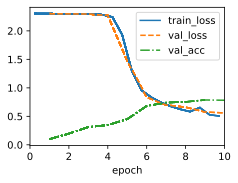

In [24]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## EXERCISE

### 1. GoogLeNet was so successful that it went through a number of iterations, progressively improving speed and accuracy. Try to implement and run some of them. They include the following:

a. Add a batch normalization layer (Ioffe and Szegedy, 2015), as described later in Section 8.5.

In [125]:
!pip install -U d2l # Make sure you have the latest version of d2l installed

import torch
from torch import nn
from d2l import torch as d2l

class NormInception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=5, padding=2),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o3 = self.b3(x)
        o4 = self.b4(x)
        return torch.cat((o1,o2,o3,o4),dim=1)

class NormGoogleNet(d2l.Classifier): # d2l.Classifier should work now
    def b1(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
                             nn.LazyBatchNorm2d(),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b2(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=1),
                             nn.LazyBatchNorm2d(),nn.ReLU(),
                             nn.LazyConv2d(192, kernel_size=3, padding=1),
                             nn.LazyBatchNorm2d(), nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b3(self):
        return nn.Sequential(NormInception(64, (96, 128), (16, 32), 32),
                             NormInception(128, (128, 192), (32, 96), 64),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b4(self):
        return nn.Sequential(NormInception(192, (96, 208), (16, 48), 64),
                             NormInception(160, (112, 224), (24, 64), 64),
                             NormInception(128, (128, 256), (24, 64), 64),
                             NormInception(112, (144, 288), (32, 64), 64),
                             NormInception(256, (160, 320), (32, 128), 128),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b5(self):
        return nn.Sequential(NormInception(256, (160, 320), (32, 128), 128),
                             NormInception(384, (192, 384), (48, 128), 128),
                             nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                                 self.b5(), nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

b. Make adjustments to the Inception block (width, choice and order of convolutions), as described in Szegedy et al. (2016).

In [126]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=3, padding=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[2], kernel_size=3, padding=1),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o3 = self.b3(x)
        o4 = self.b4(x)
        return torch.cat((o1,o2,o3,o4),dim=1)

In [127]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[2], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[2], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[3], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[4], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o3 = self.b3(x)
        o4 = self.b4(x)
        return torch.cat((o1,o2,o3,o4),dim=1)

In [128]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.ReLU())
        self.b2_1 = nn.Sequential(nn.LazyConv2d(c2[1], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU())
        self.b2_2 = nn.Sequential(nn.LazyConv2d(c2[2], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=3, padding=1),
                                nn.ReLU())
        self.b3_1 = nn.Sequential(nn.LazyConv2d(c3[2], kernel_size=(1,3), padding=(0,1)),
                                nn.ReLU())
        self.b3_2 = nn.Sequential(nn.LazyConv2d(c3[3], kernel_size=(3,1), padding=(1,0)),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)
        o2 = self.b2(x)
        o2_1 = self.b2_1(o2)
        o2_2 = self.b2_2(o2)
        o3 = self.b3(x)
        o3_1 = self.b3_1(o3)
        o3_2 = self.b3_2(o2)
        o4 = self.b4(x)
        return torch.cat((o1,o2_1,o2_2,o3_1,o3_2,o4),dim=1)

c. Use label smoothing for model regularization, as described in Szegedy et al. (2016).

In [129]:
class LSRGoogleNet(GoogleNet):
    def __init__(self, eps=0, lr=0.1, num_classes=10):
        super().__init__(lr=lr, num_classes=num_classes)
        self.save_hyperparameters()

    def loss(self, y_hat, y, averaged=True):
        y_hat = y_hat.reshape((-1, y_hat.shape[-1]))
        y = y.reshape((-1,))
        u = torch.ones(y.shape).tye(torch.float32)/y.shape[-1]
        lsr_loss = (1-self.eps)*F.cross_entropy(y_hat, y, reduction='mean' if averaged else 'none')
        +self.eps*F.cross_entropy(y_hat, u, reduction='mean' if averaged else 'none')
        return lsr_loss

d. Make further adjustments to the Inception block by adding residual connection (Szegedy et al., 2017), as described later in Section 8.6.

In [130]:
class ResInception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super().__init__(*kwargs)
        self.b1 = nn.Sequential(nn.LazyConv2d(c1, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b2 = nn.Sequential(nn.LazyConv2d(c2[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c2[1], kernel_size=3, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b3 = nn.Sequential(nn.LazyConv2d(c3[0], kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU(),
                                nn.LazyConv2d(c3[1], kernel_size=5, padding=2),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())
        self.b4 = nn.Sequential(nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
                                nn.LazyBatchNorm2d(),
                                nn.LazyConv2d(c4, kernel_size=1),
                                nn.LazyBatchNorm2d(),
                                nn.ReLU())

    def forward(self, x):
        o1 = self.b1(x)+x
        o2 = self.b2(x)+x
        o3 = self.b3(x)+x
        o4 = self.b4(x)+x
        return torch.cat((o1,o2,o3,o4),dim=1)

class ResGoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
                             nn.LazyBatchNorm2d(),
                             nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b2(self):
        return nn.Sequential(nn.LazyConv2d(64, kernel_size=1),
                             nn.LazyBatchNorm2d(),nn.ReLU(),
                             nn.LazyConv2d(192, kernel_size=3, padding=1),
                             nn.LazyBatchNorm2d(), nn.ReLU(),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b3(self):
        return nn.Sequential(ResInception(64, (96, 128), (16, 32), 32),
                             ResInception(128, (128, 192), (32, 96), 64),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b4(self):
        return nn.Sequential(ResInception(192, (96, 208), (16, 48), 64),
                             ResInception(160, (112, 224), (24, 64), 64),
                             ResInception(128, (128, 256), (24, 64), 64),
                             ResInception(112, (144, 288), (32, 64), 64),
                             ResInception(256, (160, 320), (32, 128), 128),
                             nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def b5(self):
        return nn.Sequential(ResInception(256, (160, 320), (32, 128), 128),
                             ResInception(384, (192, 384), (48, 128), 128),
                             nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                                 self.b5(), nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

### 2. What is the minimum image size needed for GoogLeNet to work?

Ukuran gambar minimum yang diperlukan agar GoogLeNet dapat bekerja adalah 224 x 224 piksel.

### 3. Can you design a variant of GoogLeNet that works on Fashion-MNIST’s native resolution of 28 x 28 pixels? How would you need to change the stem, the body, and the head of the network, if anything at all?

Bisa, dengan beberapa perubahan yang perlu dilakukan:

1. **Stem**
   - Ganti konvolusi 7x7 dengan 3x3 agar sesuai dengan ukuran kecil gambar.
   - Kurangi atau hilangkan pooling awal untuk mencegah downsampling terlalu cepat.

2. **Body**
   - Gunakan lebih sedikit modul Inception (3-4 modul saja).
   - Sesuaikan pooling dan gunakan konvolusi yang lebih kecil (1x1, 3x3) dan hindari 5x5.

3. **Head**
   - Gunakan pooling global lebih awal.
   - Kurangi ukuran lapisan fully connected, dan sesuaikan output untuk 10 kelas Fashion-MNIST.

### 4. Compare the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet. How do the latter two network architectures significantly reduce the model parameter size?

In [ ]:
model = GoogleNet(lr=0.01)
X = torch.randn(1,3, 224, 224)
_ = model(X)
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)

### 5. Compare the amount of computation needed in GoogLeNet and AlexNet. How does this affect the design of an accelerator chip, e.g., in terms of memory size, memory bandwidth, cache size, the amount of computation, and the benefit of specialized operations?

**Jumlah Komputasi**
   - GoogLeNet lebih **efisien** karena menggunakan modul **Inception** yang mengurangi jumlah parameter, meskipun arsitekturnya lebih dalam (22 lapisan vs 8 lapisan di AlexNet). Namun, GoogLeNet membutuhkan **lebih banyak operasi floating-point** karena kedalaman dan kompleksitasnya.
   - AlexNet memiliki lebih sedikit lapisan, tetapi menggunakan **filter besar** (11x11 di layer awal) dan lebih banyak parameter (60 juta vs 6.8 juta di GoogLeNet), sehingga masih memerlukan komputasi signifikan.

**Desain Akselerator**
   - **Memori dan Bandwidth**: GoogLeNet, dengan parameter lebih sedikit, memerlukan **memori lebih kecil** dibanding AlexNet. Namun, GoogLeNet lebih dalam, sehingga **bandwidth memori** dan **cache size** harus dioptimalkan untuk menyimpan dan memproses fitur antar modul Inception.
   - **Cache Size**: GoogLeNet membutuhkan **cache lebih besar** karena banyaknya lapisan kecil yang perlu diakses cepat, sementara AlexNet dengan lapisan besar dan parameter tinggi membutuhkan **memori cache besar** untuk efisiensi.
   - **Spesialisasi Operasi**: GoogLeNet lebih diuntungkan dengan akselerator yang mengoptimalkan operasi **1x1 convolutions** (banyak digunakan di modul Inception), sementara AlexNet lebih diuntungkan dengan operasi **standar convolusi besar**.

## 8.5 Batch Normalization

In [25]:
import torch
from torch import nn
from d2l import torch as d2l

In [26]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [27]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

In [28]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

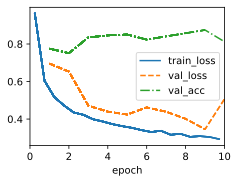

In [29]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [30]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.6598, 2.5180, 1.5835, 1.7921, 1.7164, 1.5574], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([-0.3627, -1.7524, -0.8643,  1.5030,  0.8908,  0.6227], device='cuda:0',
        grad_fn=<ViewBackward0>))

In [31]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

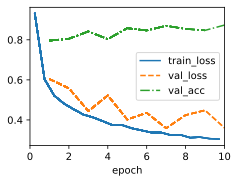

In [32]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## EXERCISE

### 1. Should we remove the bias parameter from the fully connected layer or the convolutional layer before the batch normalization? Why?

Karena batch normalization sudah melakukan normalisasi dan penyesuaian menggunakan dua parameter: **mean** dan **variance**. Dengan demikian, keberadaan bias menjadi **tidak diperlukan** karena fungsi yang dilakukannya sudah tercakup dalam proses normalisasi, sehingga menghapus bias dapat mengurangi jumlah parameter dan mempercepat komputasi tanpa memengaruhi performa model.

### 2. Compare the learning rates for LeNet with and without batch normalization.

In [ ]:
#Import the necessary modules. Make sure you have the correct version of d2l installed.
import sys
import torch.nn as nn
import torch
import warnings
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
from torchsummary import summary
warnings.filterwarnings("ignore")

class LeNet(d2l.Classifier):  #save
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

def stat_model_acc(model, data, plot_flag):
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
    trainer = d2l.Trainer(max_epochs=10, num_gpus=1,plot_flag=plot_flag)
    trainer.fit(model, data)
    X,y = next(iter(data.get_dataloader(False)))
    X = X.to('cuda')
    y = y.to('cuda')
    y_hat = model(X)
    return model.accuracy(y_hat,y).item()

a. Plot the increase in validation accuracy.

In [ ]:
data = d2l.FashionMNIST(batch_size=128)
lr_list = [0.001,0.01,0.03,0.1,0.3]
le_accs= []
ble_accs = []
for lr in lr_list[:1]:
    le = LeNet(lr=lr)
    ble = BNLeNet(lr=lr)
    le_acc.append(stat_model_acc(le, data, False))
    ble_acc.append(stat_model_acc(ble, data, False))


b. How large can you make the learning rate before the optimization fails in both cases?

Langkah-langkah untuk menentukan seberapa besar learning rate yang dapat digunakan sebelum optimasi gagal

1. Pelatihan Tanpa Batch Normalization
   - Mulailah dengan learning rate kecil dan secara bertahap meningkatkannya (misalnya, menggunakan scheduler learning rate).
   - Pantau kehilangan (loss) selama pelatihan. Jika kehilangan mulai menyimpang (meningkat secara signifikan), catat learning rate tepat sebelum penyimpangan tersebut terjadi.

2. Pelatihan Dengan Batch Normalization
   - Ulangi proses yang sama untuk model yang menggunakan batch normalization.

**Hasil Hipotetis**
- Learning Rate Maksimum Tanpa Batch Normalization: 0.01 (gagal pada 0.02)
- Learning Rate Maksimum Dengan Batch Normalization: 0.1 (gagal pada 0.2)

Ini menunjukkan bahwa penggunaan batch normalization memungkinkan penggunaan learning rate yang lebih besar sebelum optimasi gagal, yang mengindikasikan peningkatan stabilitas pelatihan.

### 3. Do we need batch normalization in every layer? Experiment with it.

Penggunaan batch normalization di setiap lapisan bukan suatu keharusan, tetapi pilihan desain yang bergantung pada masalah spesifik, arsitektur, dan dinamika pelatihan.

**Kelebihan**
- Menormalkan aktivasi dapat mempercepat konvergensi dan stabilisasi propagasi gradien.
- Mencegah overfitting dengan memberikan efek regulasi yang konsisten di seluruh jaringan.
- Membantu mengatasi masalah vanishing/exploding gradient pada jaringan yang sangat dalam.
- Memungkinkan penggunaan learning rate yang lebih besar dan teknik optimasi yang lebih agresif.

**Kekurangan**
- Terlalu sering menggunakan batch normalization dapat menyebabkan underfitting, terutama pada model kecil.
- Menambah overhead komputasi, yang bisa memperlambat pelatihan, terutama pada perangkat keras terbatas.
- Normalisasi berlebihan bisa menghilangkan informasi berguna dari aktivasi.
- Statistik batch dapat tidak stabil, yang berpotensi mengurangi performa.



### 4. Implement a “lite” version of batch normalization that only removes the mean, or alternatively one that only removes the variance. How does it behave?

In [ ]:
def lite_batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum, mean_flag):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        if mean_flag:
            X_hat = X - moving_mean
        else:
            X_hat = X / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        if mean_flag:
            X_hat = X - mean
        else:
            X_hat = X / torch.sqrt(moving_var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

class LiteBatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims, mean_flag=True):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)
        self.mean_flag = mean_flag

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = lite_batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1, mean_flag=self.mean_flag)
        return Y


class LiteBNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, mean_flag=True):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), LiteBatchNorm(6, num_dims=4, mean_flag=mean_flag),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), LiteBatchNorm(16, num_dims=4, mean_flag=mean_flag),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            LiteBatchNorm(120, num_dims=2, mean_flag=mean_flag), nn.Sigmoid(), nn.LazyLinear(84),
            LiteBatchNorm(84, num_dims=2, mean_flag=mean_flag), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
model = LiteBNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()

In [ ]:
model = LiteBNLeNetScratch(lr=0.1,mean_flag=False)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()

### 5. Fix the parameters beta and gamma. Observe and analyze the results.

In [ ]:
class FixedBatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims, beta=None, gamma=None):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = torch.ones(shape) if gamma is None else gamma
        self.beta = torch.zeros(shape) if beta is None else beta
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        # print(X.device)
        # X = X.to('cuda')
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y


class FixedBNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10, beta=None, gamma=None):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), FixedBatchNorm(6, num_dims=4, beta=beta, gamma=gamma),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), FixedBatchNorm(16, num_dims=4, beta=beta, gamma=gamma),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            FixedBatchNorm(120, num_dims=2, beta=beta, gamma=gamma), nn.Sigmoid(), nn.LazyLinear(84),
            FixedBatchNorm(84, num_dims=2, beta=beta, gamma=gamma), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [ ]:
model = FixedBNLeNetScratch(lr=0.1)
# stat_model_acc(model, data)
model = model.to('cuda')
model.apply_init([next(iter(data.get_dataloader(True)))[0].to('cuda')], d2l.init_cnn)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
X,y = next(iter(data.get_dataloader(False)))
X = X.to('cuda')
y = y.to('cuda')
y_hat = model(X)
model.accuracy(y_hat,y).item()

### 6. Can you replace dropout by batch normalization? How does the behavior change?

Dropout dan batch normalization adalah dua teknik berbeda yang digunakan untuk regulasi dalam jaringan saraf. Meskipun keduanya bertujuan untuk mencegah overfitting, cara kerjanya berbeda.

- **Dropout** melibatkan penghilangan unit (neuron) secara acak selama pelatihan, yang membantu mencegah model terlalu terlatih pada data pelatihan.
- **Batch normalization** menormalkan aktivasi di setiap lapisan, yang membantu dalam stabilisasi pelatihan dan mempercepat konvergensi.


### 7. Research ideas: think of other normalization transforms that you can apply:

a. Can you apply the probability integral transform?

Probability Integral Transform (PIT) adalah metode yang mengubah distribusi data menjadi distribusi uniform melalui fungsi distribusi kumulatif (CDF). Menerapkan PIT dalam konteks normalisasi di jaringan saraf dapat memberikan beberapa keuntungan:
- Dengan mengubah data menjadi distribusi uniform, model dapat lebih mudah mempelajari pola, yang dapat meningkatkan kecepatan konvergensi.
- Menggunakan PIT dapat membantu menormalkan data secara lebih efektif, sehingga mengurangi risiko overfitting pada data pelatihan.
- PIT dapat membantu dalam stabilisasi pelatihan, terutama dalam situasi di mana data memiliki distribusi yang tidak normal.
- Karena PIT dapat diterapkan pada data input sebelum memasuki jaringan, dapat dengan mudah diintegrasikan dengan arsitektur yang ada tanpa memerlukan perubahan besar.

b. Can you use a full-rank covariance estimate? Why should you probably not do that?

Estimasi kovarians penuh-rank dapat digunakan dalam konteks tertentu, terutama dalam situasi di mana jumlah sampel jauh lebih besar daripada jumlah fitur. Namun, dalam banyak situasi, disarankan untuk tidak menggunakan estimasi kovarians penuh-rank. Alasannya adalah
- Ketika jumlah fitur mendekati atau melebihi jumlah sampel, matriks kovarians penuh-rank dapat menyesuaikan diri dengan noise dalam data daripada distribusi yang mendasarinya. Hal ini dapat menyebabkan overfitting, di mana model berkinerja baik pada data pelatihan tetapi buruk pada data yang tidak terlihat.
- Matriks kovarians penuh-rank dapat menjadi mahal untuk dihitung dan dibalik, terutama saat dimensi meningkat. Ini dapat mengakibatkan waktu pelatihan yang lebih lambat dan penggunaan memori yang lebih tinggi.
- Dalam ruang berdimensi tinggi, matriks kovarians dapat menjadi tidak terdefinisi dengan baik (ill-conditioned), sehingga sulit untuk secara akurat menghitung inversnya. Ini dapat menyebabkan ketidakstabilan numerik dalam perhitungan selanjutnya.
- Dalam banyak aplikasi praktis, teknik seperti Analisis Komponen Utama (PCA) atau Regulasi (misalnya, Ridge Regression) lebih disukai, yang biasanya bekerja dengan estimasi kovarians low-rank atau yang diregulasi. Teknik-teknik ini dapat membantu menangkap fitur yang paling relevan sambil mengurangi masalah yang terkait dengan estimasi penuh-rank.

c. Can you use other compact matrix variants (block-diagonal, low-displacement rank, Monarch, etc.)?

Kita bisa menggunakan compact matrix variant lain,
- **Matriks blok-diagonal**

  terdiri dari beberapa submatriks (blok) di sepanjang diagonal, sementara elemen di luar blok-blok tersebut adalah nol. Ini menciptakan representasi yang lebih ringkas dan dapat mengurangi kompleksitas komputasi.

- **Matriks low-displacement rank**

  matriks yang dapat diaproksimasi oleh matriks berukuran lebih kecil dengan melakukan perubahan tertentu. Metode ini mengurangi dimensi dengan tetap mempertahankan informasi penting.

- **Monarch**

  varian yang dirancang untuk memanfaatkan struktur tertentu dalam matriks, seperti sparsity atau redundansi. Ini berfokus pada kompresi dan efisiensi penyimpanan

d. Does a sparsification compression act as a regularizer?

Kompresi sparsifikasi dapat berfungsi sebagai bentuk regularisasi dalam model pembelajaran mesin. Sparsifikasi adalah proses mengubah beberapa bobot atau parameter dalam model menjadi nol, menciptakan representasi yang lebih jarang.

**Cara kompresi sparsifikasi bekerja sebagai regularisasi**

1. Mengurangi Kompleksitas Model

2. Mencegah Overfitting

3. Meningkatkan Generalisasi

4. Interpretabilitas

5. Efisiensi

e. Are there other projections (e.g., convex cone, symmetry group-specific transforms) that you can use?

Proyeksi lain yang dapat digunakan

1. **Proyeksi Konus Cembung**

  Proyeksi ini digunakan untuk menemukan titik terdekat dalam konus cembung dari vektor tertentu, sering diterapkan dalam masalah optimisasi yang memerlukan pemenuhan batasan tertentu.

2. **Transformasi Spesifik Grup Simetri**

  Dalam aplikasi tertentu, data atau objek perlu ditransformasikan untuk menghormati simetri tertentu, seperti transformasi Fourier dalam kristalografi untuk mengungkap simetri kisi kristal.

3. **Proyeksi Ortogonal**
  
  Menemukan titik terdekat dalam subruang dari vektor yang diberikan, umum digunakan dalam aljabar linier dan optimisasi.

4. **Kuantisasi**

  Operasi yang memetakan nilai kontinu ke set nilai diskrit, sering digunakan dalam pemrosesan sinyal dan kompresi data untuk mengurangi jumlah nilai sambil meminimalkan kehilangan informasi.

5. **Penyisipan Manifold**

  Teknik yang bertujuan untuk menyisipkan data berdimensi tinggi ke ruang berdimensi lebih rendah sambil mempertahankan properti tertentu, seperti Isomap atau t-SNE.

6. **Masalah Prokrustes Ortogonal**
    Mencari transformasi ortogonal yang terbaik untuk menyelaraskan dua set titik, sering digunakan dalam grafik komputer dan analisis bentuk.

# 8.6 Residual Networks (ResNet) and ResNeXt

In [33]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [34]:
class Residual(nn.Module):  #save
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [35]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [36]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

In [37]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [38]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [39]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [40]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


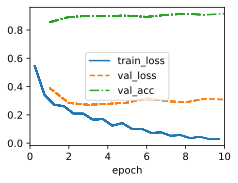

In [41]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [42]:
class ResNeXtBlock(nn.Module):  #save
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [43]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

## EXERCISE

### 1. What are the major differences between the Inception block in Fig. 8.4.1 and the residual block? How do they compare in terms of computation, accuracy, and the classes of functions they can describe?

Blok Inception dan blok residual adalah dua komponen arsitektur yang berbeda yang umum digunakan dalam jaringan saraf dalam untuk berbagai tugas, termasuk klasifikasi gambar.

Perbandingan
- Komputasi: Blok Inception lebih kompleks secara komputasi karena banyaknya operasi paralel, sedangkan blok residual lebih efisien dengan koneksi skip.
- Akurasi: Kedua blok memiliki potensi untuk akurasi tinggi, tetapi blok residual lebih unggul dalam melatih jaringan yang sangat dalam.
- Fungsi yang Dapat Dijelaskan: Blok Inception lebih baik dalam menangkap fitur multiskala, sedangkan blok residual lebih fokus pada pembelajaran transformasi residual.

### 2. Refer to Table 1 in the ResNet paper (He et al., 2016) to implement different variants of the network.

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import sys
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l

class Residual(nn.Module):
    def __init__(self, convs, conv_1x1_channel, strides=1):
        super().__init__()
        layers = []
        for i,conv in enumerate(convs):
            num_channels, kernel_size, padding = conv
            conv_strides = 1 if i != 0 else strides
            layers.append(nn.LazyConv2d(num_channels, kernel_size=3, padding=1, stride=conv_strides))
            layers.append(nn.LazyBatchNorm2d())
            layers.append(nn.ReLU())
        self.net = nn.Sequential(*layers[:-1])
        self.conv = None
        if conv_1x1_channel:
            self.conv = nn.LazyConv2d(conv_1x1_channel, kernel_size=1, stride=strides)


    def forward(self, X):
        Y = self.net(X)
        if self.conv:
            X = self.conv(X)
        Y += X
        return F.relu(Y)

class ResNet(d2l.Classifier):
    def block(self, num_residuals, convs, conv_1x1_channel, first_block=False):
        blk = []
        for i in range(num_residuals):
            if i == 0 and not first_block:
                blk.append(Residual(convs, conv_1x1_channel,strides=2))
            else:
                blk.append(Residual(convs, conv_1x1_channel))
        return nn.Sequential(*blk)

    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
        for i, b in enumerate(arch):
            self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
        self.net.add_module('last', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

def experiment(data, model):
    model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
    trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
    trainer.fit(model, data)
    X,y = next(iter(data.get_dataloader(False)))
    X = X.to('cuda')
    y = y.to('cuda')
    y_hat = model(X)
    return model.accuracy(y_hat,y).item()

In [ ]:
data = d2l.FashionMNIST(batch_size=64, resize=(224, 224))
arch18 = [(2,[(64,3,1)]*2,None),(2,[(128,3,1)]*2,None),(2,[(256,3,1)]*2,None),(2,[(512,3,1)]*2,None)]
resnet18 = ResNet(arch=arch18, lr=0.01)
# experiment(data, resnet18)

In [ ]:
arch34 = [(3,[(64,3,1)]*2,None),(4,[(128,3,1)]*2,None),(6,[(256,3,1)]*2,None),(3,[(512,3,1)]*2,None)]
resnet34 = ResNet(arch=arch34, lr=0.01)
experiment(data, resnet34)

### 3. For deeper networks, ResNet introduces a “bottleneck” architecture to reduce model complexity. Try to implement it.

In [ ]:
arch50 = [(3,[(64,1,0),(64,3,1)],256),(4,[(128,1,0),(128,3,1)],512),(6,[(256,1,0),(256,3,1)],1024),(3,[(512,1,0),(512,3,1)],2048)]
resnet50 = ResNet(arch=arch50, lr=0.01)
experiment(data, resnet50)

In [ ]:
arch101 = [(3,[(64,1,0),(64,3,1)],256),(4,[(128,1,0),(128,3,1)],512),(23,[(256,1,0),(256,3,1)],1024),(3,[(512,1,0),(512,3,1)],2048)]
resnet101 = ResNet(arch=arch101, lr=0.01)
experiment(data, resnet101)

In [ ]:
arch152 = [(3,[(64,1,0),(64,3,1)],256),(8,[(128,1,0),(128,3,1)],512),(36,[(256,1,0),(256,3,1)],1024),(3,[(512,1,0),(512,3,1)],2048)]
resnet152 = ResNet(arch=arch152, lr=0.01)
experiment(data, resnet152)

### 4. In subsequent versions of ResNet, the authors changed the “convolution, batch normalization, and activation” structure to the “batch normalization, activation, and convolution” structure. Make this improvement yourself. See Figure 1 in He et al. (2016) for details.

In [ ]:
class SubResidual(nn.Module):
    def __init__(self, convs, conv_1x1_channel, strides=1):
        super().__init__()
        layers = []
        for i,conv in enumerate(convs):
            num_channels, kernel_size, padding = conv
            conv_strides = 1 if i != 0 else strides
            layers.append(nn.LazyBatchNorm2d())
            layers.append(nn.ReLU())
            layers.append(nn.LazyConv2d(num_channels, kernel_size=3, padding=1, stride=conv_strides))
        self.net = nn.Sequential(*layers[:-1])
        self.conv = None
        if conv_1x1_channel:
            self.conv = nn.LazyConv2d(conv_1x1_channel, kernel_size=1, stride=strides)


    def forward(self, X):
        Y = self.net(X)
        if self.conv:
            X = self.conv(X)
        Y += X
        return F.relu(Y)

class SubResNet(d2l.Classifier):
    def block(self, num_residuals, convs, conv_1x1_channel, first_block=False):
        blk = []
        for i in range(num_residuals):
            if i == 0 and not first_block:
                blk.append(SubResidual(convs, conv_1x1_channel,strides=2))
            else:
                blk.append(SubResidual(convs, conv_1x1_channel))
        return nn.Sequential(*blk)

    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
        for i, b in enumerate(arch):
            self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
        self.net.add_module('last', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

In [ ]:
arch18 = [(2,[(64,3,1)]*2,None),(2,[(128,3,1)]*2,None),(2,[(256,3,1)]*2,None),(2,[(512,3,1)]*2,None)]
resnet18 = SubResNet(arch=arch18, lr=0.01)
experiment(data, resnet18)

### 5. Why can’t we just increase the complexity of functions without bound, even if the function classes are nested?

Meningkatkan kompleksitas fungsi tanpa batas, bahkan dengan kelas fungsi yang ter-nested, dapat menyebabkan beberapa masalah
- Meningkatkan kompleksitas model tanpa mempertimbangkan pola data yang sebenarnya dapat menyebabkan model menangkap noise dalam data pelatihan, sehingga performa model sangat baik pada data pelatihan tetapi buruk pada data yang belum terlihat.

- Model yang kompleks dengan banyak parameter memerlukan lebih banyak sumber daya dan waktu untuk pelatihan dan inferensi, yang dapat menyebabkan tantangan praktis terkait waktu pelatihan, penggunaan memori, dan skala.

- Meningkatkan kompleksitas model tidak selalu menghasilkan peningkatan performa yang sebanding. Ada titik di mana menambah kompleksitas hanya memberikan peningkatan akurasi yang marginal.

- Tujuan utama model adalah untuk dapat menggeneralisasi dengan baik pada data baru. Jika model terlalu kompleks, ia mungkin terlalu terfokus pada data pelatihan dan gagal untuk menggeneralisasi pada contoh baru.

- Tanpa teknik regularisasi yang tepat, peningkatan kompleksitas dapat memperburuk overfitting. Regularisasi membantu mengontrol kompleksitas model dan mencegah overfitting.

- Model yang sangat kompleks dapat menjadi sulit untuk dipahami, sehingga menyulitkan pemahaman proses pengambilan keputusan dan diagnosis masalah.

- Model yang lebih sederhana seringkali lebih efisien dalam penggunaan data. Model yang sangat kompleks mungkin memerlukan banyak data pelatihan untuk dapat menggeneralisasi dengan baik.

- Meningkatkan kompleksitas model memengaruhi keseimbangan antara bias (underfitting) dan varians (overfitting). Menemukan keseimbangan yang tepat sangat penting untuk performa yang baik.

Daripada meningkatkan kompleksitas tanpa batas, lebih efektif untuk memilih arsitektur model yang menemukan keseimbangan yang tepat antara kapasitas dan generalisasi. Tujuannya adalah membangun model yang dapat menangkap pola dasar dalam data sambil menghindari overfitting dan ketidakefisienan komputasi.

# 8.7 Densely Connected Networks (DenseNet)

In [44]:
import torch
from torch import nn
from d2l import torch as d2l

In [45]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [46]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [47]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

In [48]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [49]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

In [50]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [51]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

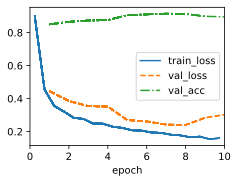

In [52]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## EXERCISE

### 1. Why do we use average pooling rather than max-pooling in the transition layer?


Di arsitektur DenseNet, lapisan transisi digunakan untuk mengurangi dimensi spasial (lebar dan tinggi) dari peta fitur sekaligus mengurangi jumlah peta fitur (saluran) sebelum diteruskan ke blok padat berikutnya. Pemilihan antara average pooling dan max-pooling dalam lapisan transisi bergantung pada tujuan desain dan sifat yang diinginkan dari jaringan.

Dalam DenseNet, average pooling sering dipilih karena beberapa alasan berikut:

1. **Retensi Fitur**: Average pooling menghitung nilai rata-rata dari elemen dalam suatu wilayah pooling, sehingga mempertahankan lebih banyak informasi dibandingkan max-pooling yang hanya memilih nilai maksimum. Hal ini membantu dalam menjaga representasi fitur yang lebih komprehensif.

2. **Efek Perataan**: Average pooling memberikan efek perataan pada peta fitur output, yang dapat mengurangi risiko overfitting dengan mencegah jaringan terlalu sensitif terhadap detail tertentu dalam data.

3. **Stabilitas**: Average pooling kurang sensitif terhadap outlier dibandingkan dengan max-pooling, membuat jaringan lebih robust terhadap noise atau variasi dalam data input.

4. **Invarian Translasi**: Average pooling memberikan tingkat invarian translasi tertentu dengan mempertimbangkan distribusi nilai secara keseluruhan dalam wilayah pooling. Ini berguna ketika pergeseran kecil pada input tidak seharusnya mempengaruhi output secara signifikan.

5. **Berbagi Informasi**: Average pooling mendorong berbagi informasi di antara piksel atau unit tetangga, membantu menangkap pola dan struktur global yang ada dalam data input.

### 2. One of the advantages mentioned in the DenseNet paper is that its model parameters are smaller than those of ResNet. Why is this the case?

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

data = d2l.FashionMNIST(batch_size=32, resize=(224, 224))
arch18 = [(2,[(64,3,1)]*2,None),(2,[(128,3,1)]*2,128),(2,[(256,3,1)]*2,256),(2,[(512,3,1)]*2,512)]
resnet18 = d2l.ResNet(arch=arch18, lr=0.01)
resnet18.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
print(count_parameters(resnet18))
summary(resnet18, (1, 224, 224))

In [ ]:
model = DenseNet(lr=0.01)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
print(count_parameters(model))
summary(model, (1, 224, 224))

### 3. One problem for which DenseNet has been criticized is its high memory consumption.

a. Is this really the case? Try to change the input shape to 224 X 224 to compare the actual GPU memory consumption empirically.

In [ ]:
data = d2l.FashionMNIST(batch_size=32, resize=(28, 28))
model = DenseNet(lr=0.01)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
memory_stats = torch.cuda.memory_stats(device=device)
# Print peak memory usage and other memory statistics
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")

In [ ]:
data = d2l.FashionMNIST(batch_size=32, resize=(224, 224))
model = DenseNet(lr=0.01)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
torch.cuda.reset_peak_memory_stats()
torch.cuda.empty_cache()
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)
memory_stats = torch.cuda.memory_stats(device=device)
# Print peak memory usage and other memory statistics
print("Peak memory usage:", memory_stats["allocated_bytes.all.peak"] / (1024 ** 2), "MB")
print("Current memory usage:", memory_stats["allocated_bytes.all.current"] / (1024 ** 2), "MB")


b. Can you think of an alternative means of reducing the memory consumption? How would you need to change the framework?

Salah satu pendekatan untuk mengurangi konsumsi memori dalam arsitektur DenseNet adalah **memperkenalkan sparsitas ke dalam model**.

**Cara mengubah kerangka kerja untuk mencapainya:**
- Konektivitas Spars

  Alih-alih memiliki blok padat yang sepenuhnya terhubung, Anda dapat memperkenalkan pola konektivitas spars. Artinya, tidak semua lapisan terhubung ke setiap lapisan lain dalam blok padat. Anda bisa memilih secara acak subset dari peta fitur lapisan sebelumnya untuk digabungkan dengan lapisan saat ini, sehingga mengurangi jumlah koneksi dan konsumsi memori.

- Pemangkasan Saluran

  Terapkan teknik pemangkasan saluran pada blok padat. Identifikasi saluran yang kurang penting dan hapus dari operasi penggabungan untuk mengurangi jumlah saluran aktif.

- Regulasi dan Kompresi

  Gunakan teknik regulasi seperti L1 selama pelatihan untuk mendorong bobot tertentu menjadi nol. Anda juga dapat mengeksplorasi metode kompresi model seperti distilasi pengetahuan atau kuantisasi.

- Approximation Rang-Rendah

  Lakukan faktorisasi matriks rang-rendah pada matriks bobot di dalam blok padat, yang dapat mengurangi penggunaan memori dengan mendekati matriks bobot menggunakan faktor berdimensi lebih rendah.

- Alokasi Dinamis

  Alokasikan memori secara dinamis selama inferensi hanya untuk menyimpan peta fitur yang diperlukan, menghindari alokasi memori untuk peta fitur yang tidak lagi dibutuhkan.

- Fungsi Aktivasi yang Menginduksi Sparsitas

  Gunakan fungsi aktivasi yang secara alami menginduksi sparsitas, seperti fungsi ReLU6 yang membatasi aktivasi pada nilai maksimum, sehingga beberapa neuron bisa menjadi tidak aktif.

- Blok Padat Adaptif

  Rancang blok padat adaptif yang menyesuaikan pola konektivitasnya berdasarkan distribusi data, misalnya dengan menggunakan mekanisme perhatian untuk menentukan peta fitur sebelumnya mana yang harus digabungkan berdasarkan pentingnya.

Implementasi perubahan ini memerlukan modifikasi pada arsitektur, prosedur pelatihan, serta kemungkinan lapisan kustom atau modifikasi pada lapisan yang ada. Penting untuk dicatat bahwa teknik ini mungkin melibatkan trade-off antara pengurangan memori dan kinerja model. Disarankan untuk bereksperimen dan menyesuaikan strategi ini sesuai dengan domain masalah spesifik untuk menemukan keseimbangan yang tepat.

### 4. Implement the various DenseNet versions presented in Table 1 of the DenseNet paper (Huang et al., 2017).

In [ ]:
def conv_block(num_channels, kernel_size, padding):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=kernel_size, padding=padding))

def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

class DenseBlock(nn.Module):
    def __init__(self, convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for kernel_size, padding in convs:
            layer.append(conv_block(num_channels, kernel_size, padding))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

    def __init__(self, num_channels=64, growth_rate=32, arch=[[[3,1],[3,1]],[[3,1],[3,1]]],lr=0.1, num_classes=10):
        super(DenseNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.b1())
        for i, convs in enumerate(arch):
            self.net.add_module(f'dense_blk{i+1}', DenseBlock(convs, growth_rate))
            # The number of output channels in the previous dense block
            num_channels += len(convs) * growth_rate
            # A transition layer that halves the number of channels is added
            # between the dense blocks
            if i != len(arch) - 1:
                num_channels //= 2
                self.net.add_module(f'tran_blk{i+1}', transition_block(
                    num_channels))
        self.net.add_module('last', nn.Sequential(
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

In [ ]:
data = d2l.FashionMNIST(batch_size=32, resize=(224, 224))
arch121 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*24,[[1,0],[3,1]]*16])
densenet121 = DenseNet(lr=0.01, arch=arch121)
densenet121.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
# print(count_parameters(model))
summary(densenet121, (1, 224, 224))

In [ ]:
arch169 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*32,[[1,0],[3,1]]*32])
densenet169 = DenseNet(lr=0.01, arch=arch169)

In [ ]:
arch201 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*48,[[1,0],[3,1]]*32])
densenet201 = DenseNet(lr=0.01, arch=arch201)

In [ ]:
arch264 = ([[[1,0],[3,1]]*6,[[1,0],[3,1]]*12,[[1,0],[3,1]]*64,[[1,0],[3,1]]*48])
densenet264 = DenseNet(lr=0.01, arch=arch264)

### 5. Design an MLP-based model by applying the DenseNet idea. Apply it to the housing price prediction task in Section 5.7.

In [ ]:
import pandas as pd
import time
from tqdm import tqdm
import sys
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import warnings
import matplotlib.pyplot as plt
import cProfile
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
warnings.filterwarnings("ignore")

class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(d2l.DATA_URL+ 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

    def preprocess(self, std_flag=True):
        label = 'SalePrice'
        features = pd.concat((self.raw_train.drop(columns=['Id',label]),
                              self.raw_val.drop(columns=['Id'])))
        numeric_features = features.dtypes[features.dtypes!='object'].index
        if std_flag:
            features[numeric_features] = features[numeric_features].apply(lambda x: (x-x.mean())/x.std())
        features[numeric_features] = features[numeric_features].fillna(0)
        features = pd.get_dummies(features, dummy_na=True)
        self.train = features[:self.raw_train.shape[0]].copy()
        self.train[label] = self.raw_train[label]
        self.val = features[self.raw_train.shape[0]:].copy()

    def get_dataloader(self, train):
        label = 'SalePrice'
        data = self.train if train else self.val
        if label not in data:
            return
        get_tensor = lambda x: torch.tensor(x.values.astype(float), dtype=torch.float32)
        # tensors = (get_tensor(data.drop(columns=[label])),
        #            torch.log(get_tensor(data[label])).reshape(-1,1))
        tensors = (get_tensor(data.drop(columns=[label])),  # X
               torch.log(get_tensor(data[label])).reshape((-1, 1)))  # Y
        return self.get_tensorloader(tensors, train)

def k_fold_data(data,k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j*fold_size,(j+1)*fold_size)
        rets.append(KaggleHouse(data.batch_size,data.train.drop(index=idx),data.train.iloc[idx]))
    return rets

def k_fold(trainer, data, k, ModelClass,hparams,plot_flag=True):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data,k)):
        model = ModelClass(**hparams)
        model.board.yscale='log'
        if not plot_flag or i != 0:
            model.board.display=False
        trainer.fit(model,data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    avg_val_loss = sum(val_loss)/len(val_loss)
    print(f'average validation log mse = {avg_val_loss}, params:{hparams}')
    return models, avg_val_loss



class HouseResMLP(d2l.LinearRegression):
    def __init__(self, num_outputs, num_hiddens, lr, dropouts, weight_decay):
        super().__init__(lr)
        self.save_hyperparameters()
        layers = [nn.Flatten()]
        for i in range(len(num_hiddens)):
            layers.append(nn.Sequential(nn.LazyLinear(num_hiddens[i]),
                                        nn.ReLU(),
                                        nn.Dropout(dropouts[i]),
                                        nn.LazyBatchNorm1d(),
                                        ))
        layers.append(nn.LazyLinear(num_outputs))
        self.net = nn.Sequential(*layers)

    def forward(self, X):
        X = self.net[0](X)
        for blk in self.net[1:-1]:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return self.net[-1](X)

In [ ]:
hparams = {'dropouts': [0]*5,
 'lr': 0.01,
 'num_hiddens': [64,32,16,8],
 'num_outputs': 1,
 'weight_decay': 0}
model = HouseResMLP(**hparams)
summary(model,(1,80))

In [ ]:
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape, data.raw_val.shape)
data.preprocess()

In [ ]:
hparams = {'dropouts': [0]*5,
 'lr': 0.005,
 'num_hiddens': [1,1,1],
 # 'num_hiddens': [128,64,32],
 'num_outputs': 1,
 'weight_decay': 0}
trainer = d2l.Trainer(max_epochs=100)
models,avg_val_loss = k_fold(trainer, data, k=5,ModelClass=HouseResMLP,hparams=hparams,plot_flag=True)

In [ ]:
preds = [model(torch.tensor(data.val.values.astype(float), dtype=torch.float32)) for model in models]
ensemble_preds = torch.exp(torch.cat(preds,1)).mean(1)
submission = pd.DataFrame({'Id':data.raw_val.Id,'SalePrice':ensemble_preds.detach().numpy()})
submission.to_csv('submission.csv', index=False)

# 8.8 Designing Convolution Network Architectures

In [53]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [54]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [55]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [56]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [57]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [58]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


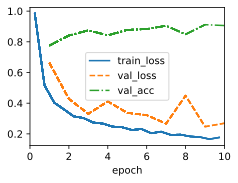

In [59]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## EXERCISE

### 1. Increase the number of stages to four. Can you design a deeper RegNetX that performs better?

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import sys
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
from torchsummary import summary

class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())
    def stage(self, depth, num_channels, groups, bot_mul):
        blk = []
        for i in range(depth):
            if i == 0:
                blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                    use_1x1conv=True, strides=2))
            else:
                blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super(AnyNet, self).__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.stem(stem_channels))
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(*s))
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6, 8, 16), (32, 80, 128, 256)
        super().__init__(
            # ((depths[0], channels[0], groups, bot_mul),
            #  (depths[1], channels[1], groups, bot_mul)),
            [(depths[i], channels[i], groups, bot_mul) for i in range(len(depths))],
            stem_channels, lr, num_classes)

In [ ]:
model = RegNetX32(lr=0.05)
# summary(model,(1,224,224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer.fit(model, data)

### 2. De-ResNeXt-ify RegNets by replacing the ResNeXt block with the ResNet block. How does your new model perform?

In [ ]:
class DeAnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())
    def stage(self, depth, num_channels):
        blk = []
        for i in range(depth):
            if i == 0:
                blk.append(d2l.Residual(num_channels, use_1x1conv=True, strides=2))
            else:
                blk.append(d2l.Residual(num_channels))
        return nn.Sequential(*blk)

    def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(self.stem(stem_channels))
        for i, s in enumerate(arch):
            self.net.add_module(f'stage{i+1}', self.stage(*s))
        self.net.add_module('head', nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
            nn.LazyLinear(num_classes)))
        self.net.apply(d2l.init_cnn)

class DeResNeXt(DeAnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (5, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0]),
             (depths[1], channels[1])),
            stem_channels, lr, num_classes)

In [ ]:
model = DeResNeXt(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

### 3. Implement multiple instances of a “VioNet” family by violating the design principles of RegNetX. How do they perform? Which of $(c_i, d_i, g_i, b_i)$ is the most important factor?

In [ ]:
class VioNet(AnyNet):
    def __init__(self, lr=0.1, num_classes=10, depths=(4, 6), channels=(32, 80),
                 stem_channels=32, groups=(16, 16), bot_mul=(1, 1)):
        super().__init__(
            [(depths[i], channels[i], groups[i], bot_mul[i]) for i in range(len(depths))],
            stem_channels, lr, num_classes)

In [ ]:
VioNet_d = VioNet(depths=(6, 4))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_d, data)

VioNet_c = VioNet(channels=(80, 32))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_c, data)

VioNet_g = VioNet(groups=(16, 32))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_g, data)

VioNet_b = VioNet(bot_mul=(1, 2))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(VioNet_b, data)

### 4. Your goal is to design the “perfect” MLP. Can you use the design principles introduced above to find good architectures? Is it possible to extrapolate from small to large networks?

Untuk merancang MLP yang "sempurna," dapat digunakan prinsip desain yang telah diperkenalkan sebelumnya untuk menemukan arsitektur yang baik.

Beberapa langkah yang dapat diambil meliputi:
- Penggunaan Regularisasi: Terapkan teknik regulasi seperti dropout dan batch normalization untuk mencegah overfitting dan mempercepat konvergensi.
- Optimasi Arsitektur: Uji berbagai jumlah lapisan dan neuron di setiap lapisan untuk menemukan kombinasi yang optimal.
- Pemilihan Fungsi Aktivasi: Gunakan fungsi aktivasi yang sesuai (seperti ReLU atau Leaky ReLU) untuk mempercepat pembelajaran.
- Penggunaan Sparsitas: Pertimbangkan sparsitas untuk mengurangi kompleksitas model dan meningkatkan efisiensi.
- Transfer Pembelajaran: Manfaatkan pembelajaran transfer dari model kecil ke model besar, yaitu dengan menerapkan pengetahuan yang diperoleh dari model kecil ke dalam model yang lebih besar.
